## Домашнее задание

1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).
2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

In [345]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split

### Needed functions

In [357]:
def to_one_hot(Y):
    ''' Takes array with a few unique values like [1, 3, 2]
        Returns array like [[1, 0, 0], 
                            [0, 0, 1],
                            [0, 1, 0]]
    '''
    n_col = len(np.unique(Y))
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

def from_one_hot(Y):
    ''' Reverses the previous function'''
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

def sigmoid(x):
    ''' Calculates sigmoid function'''
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

def show_preds(network_output, y_train, class_n: int, N: int = 100):
    ''' Shows a comparison plot (predicted classes are compared with true ones)'''
    plt.figure(figsize = (16,5))
    plt.plot(network_output[:N,class_n], 'r',label = 'Y new')
    plt.plot(y_train[:N, class_n],'g', label = 'Y train')
    plt.xlabel('Sample number')
    plt.ylabel('Predicted and real classes')
    plt.legend()
    plt.title(f'{class_n + 1} class predictions vs reality')
    plt.grid()
    plt.show()
    
def show_training_progress(errors, errors_test):
    plt.figure(figsize = (16,5))
    plt.rcParams.update({'font.size': 16})
    plt.plot(errors, label='Error on train')
    plt.plot(errors_test, label='Error on test')
    plt.xlabel('Learning')
    plt.ylabel('Error')
    plt.legend()
    plt.grid()
    plt.show()
    

def train_neural_net(X_train, X_test, y_train, y_test, weights0, weights1, \
                     learning_rate: float = 0.01, epochs: int = 500):
    ''' Trains a simple neaural network
        Returns adjusted weights matrices and an array with errors on each iteration 
        to build a 'training progression' plot later
    '''
    w0 = weights0.copy()
    w1 = weights1.copy()
    errors = []
    errors_test = []

    for i in range(epochs):

        # feed forward
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # back propagation
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        # weights adjustment
        w1 += layer1.T.dot(layer2_delta) * learning_rate
        w0 += layer0.T.dot(layer1_delta) * learning_rate

        # metric
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        
        # eval on test
        test_output = feed_forward(X_test, w0, w1)
        test_error_matr = y_test - test_output

        mean_test_error = np.mean(np.abs(test_error_matr))
        errors_test.append(mean_test_error)
    
    return w0, w1, errors, errors_test

def feed_forward(X, w0, w1):
    ''' Returns NN predictions'''
    layer0 = X
    layer1 = sigmoid(layer0 @ w0)
    layer2 = sigmoid(layer1 @ w1)    
    return layer2

### Downloading the data

In [7]:
iris_data = pd.read_csv('Iris.csv')
iris_data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


### Data preview, train/test split

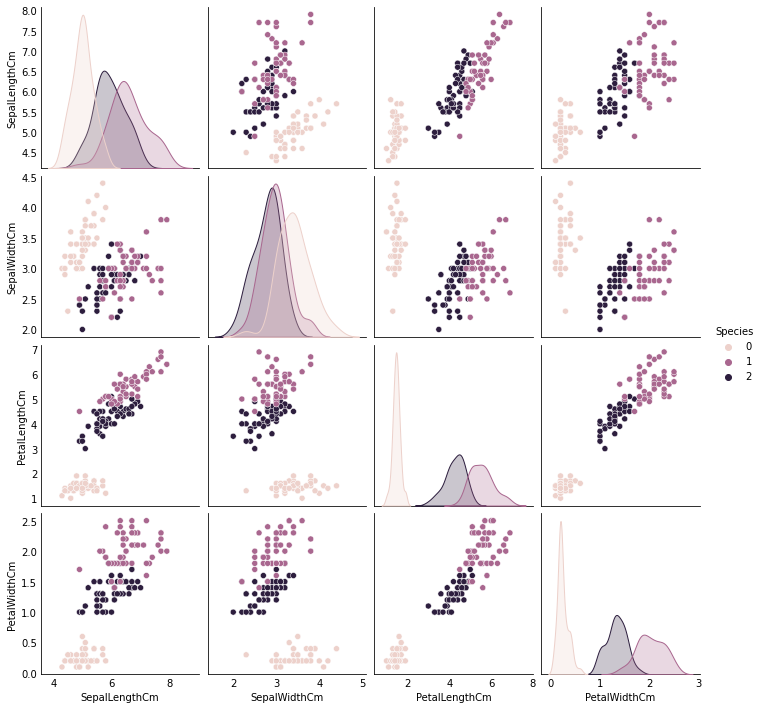

In [116]:
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")

iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

This data is an example of a really good one in terms of machine learning. We can clearly see clusters, that represents classes and the data has pretty low variance, which means that we can reach a high score (really low error)

### Train a simple neural network

In [359]:
neurons_number = 4  # how many neurons will contain the hidden layer
lr = 0.01           # learning rate for back propagation
epochs = 500        # quantity of 'learning cycles' of the neural network

# making matrices with random weights
np.random.seed(7575)
weights0 = 2 * np.random.random((4, neurons_number)) - 1
weights1 = 2 * np.random.random((neurons_number, 3)) - 1

In [360]:
# train a NN
w0_0, w1_0, errors_0, errors_test_0 = train_neural_net(X_train, X_test, y_train, y_test, \
                                        weights0, weights1, learning_rate=lr, epochs=epochs)

### Show the results of the neural network

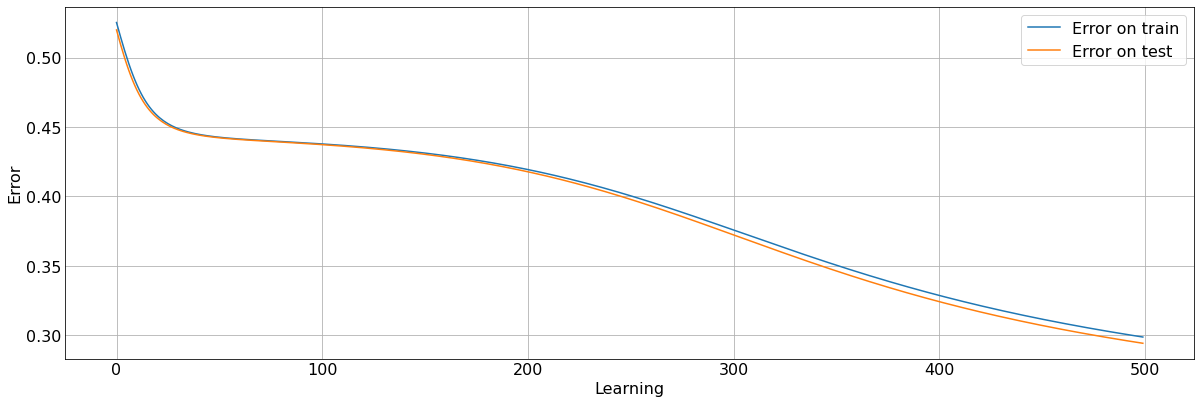

NN accuracy on train data: 70.13%
Mean error now: 0.2987


In [361]:
show_training_progress(errors_0, errors_test_0)

print(f"NN accuracy on train data: {str(round((1 - errors_0[-1]) * 100, 2))}%\n"
      f"Mean error now: {errors_0[-1]:.4f}")

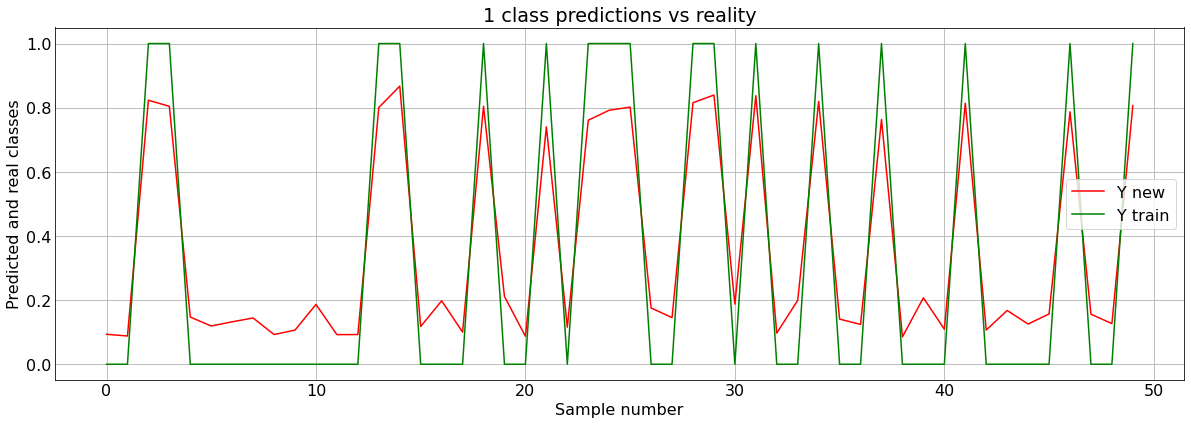

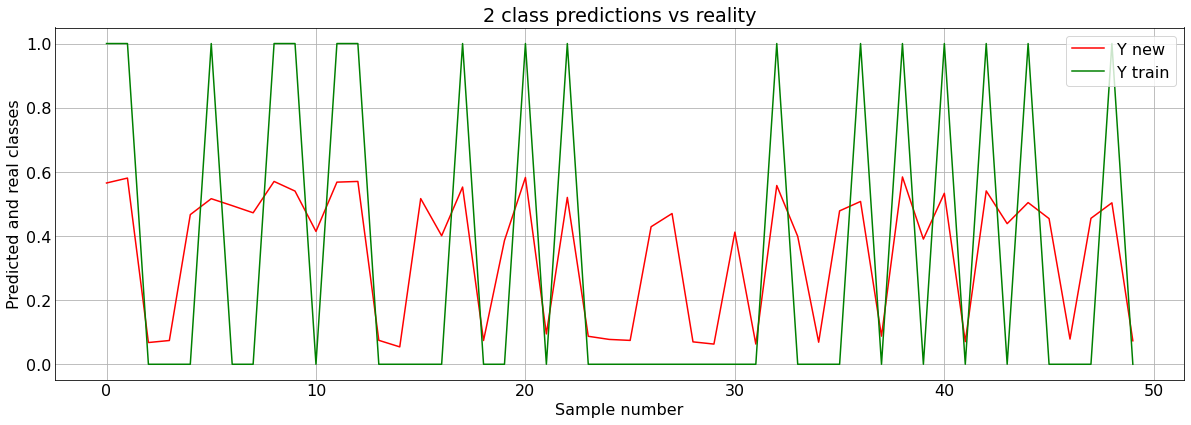

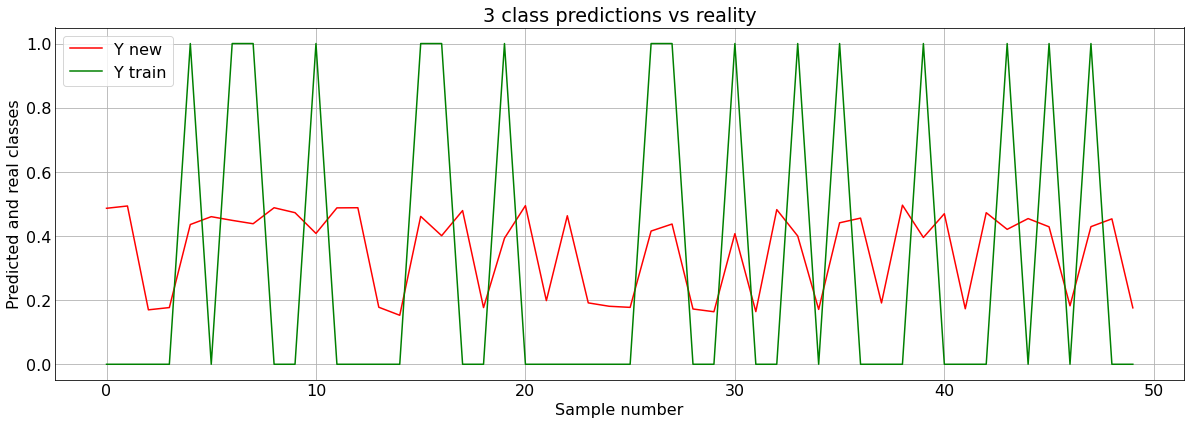

NN accuracy on test data: 70.58%


In [354]:
# feed_forward()
test_output = feed_forward(X_test, w0_0, w1_0)
test_error_matr = y_test - test_output

# results
show_preds(test_output, y_test, 0, N=50)
show_preds(test_output, y_test, 1, N=50)
show_preds(test_output, y_test, 2, N=50)

mean_test_error = np.mean(np.abs(test_error_matr))
accuracy_test = (1 - mean_test_error) * 100
print("NN accuracy on test data: " + str(round(accuracy_test,2)) + "%")

### I just trained the model for 500 epochs with learning rate of 0.01
It already has accuracy metric around 70% on test data, which is a result. On the graphicis above we can clearly see that the model in underfitted yet. So if we continue training, the accuracy rate should increase. We can also set higher learning rate at the start and decrease it as neural network learns

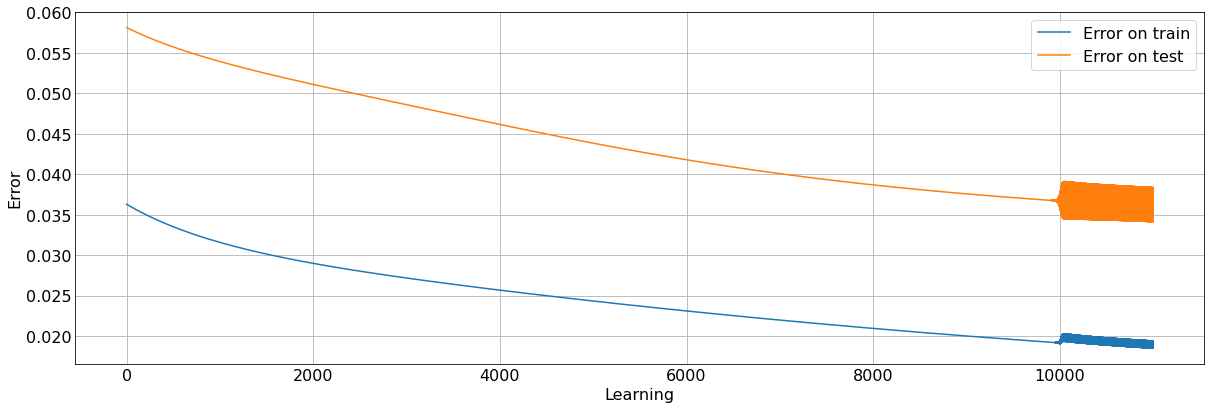

NN accuracy on train data: 98.15%
NN accuracy on test data: 96.16%


In [364]:
# train the model
w0_1, w1_1, errors_1, errors_test_1 = train_neural_net(X_train, X_test, y_train, y_test, w0, w1, \
                                                       learning_rate=0.1, epochs=11000)

show_training_progress(errors_1, errors_test_1)

# feed_forward()
test_output = feed_forward(X_test, w0_1, w1_1)
test_error_matr = y_test - test_output

mean_test_error = np.mean(np.abs(test_error_matr))

print(f"NN accuracy on train data: {str(round((1 - errors_1[-1]) * 100, 2))}%")
print("NN accuracy on test data: " + str(round((1 - mean_test_error) * 100,2)) + "%")

### Here I reached a 'minimum pit', 
where our learning rate can't continue minimizing our error anymore in an appropriate way. So we should drop our learning rate a bit and we'll be able to get more accurate predictions and less error.

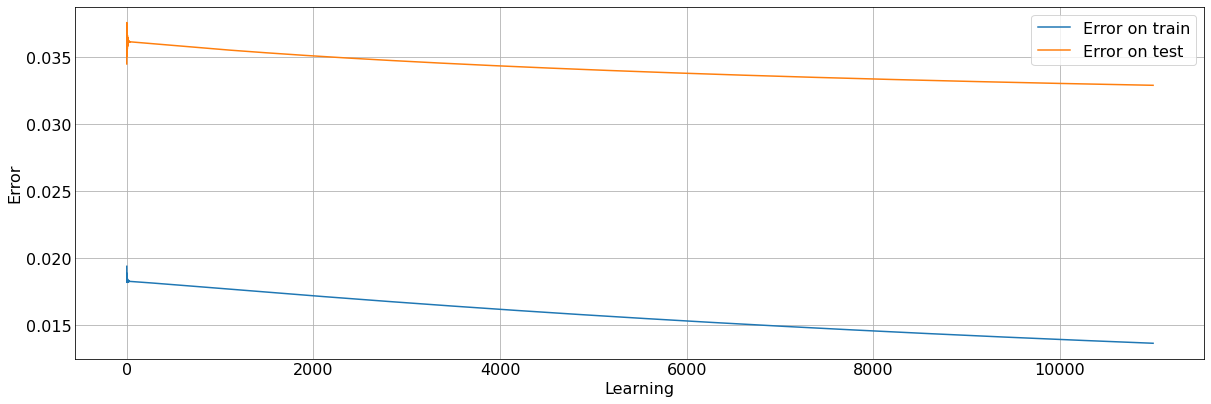

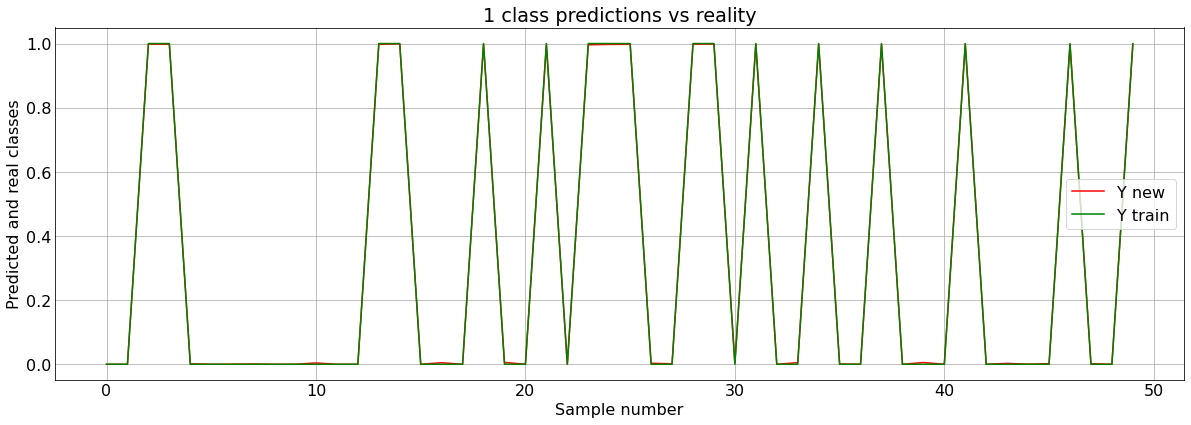

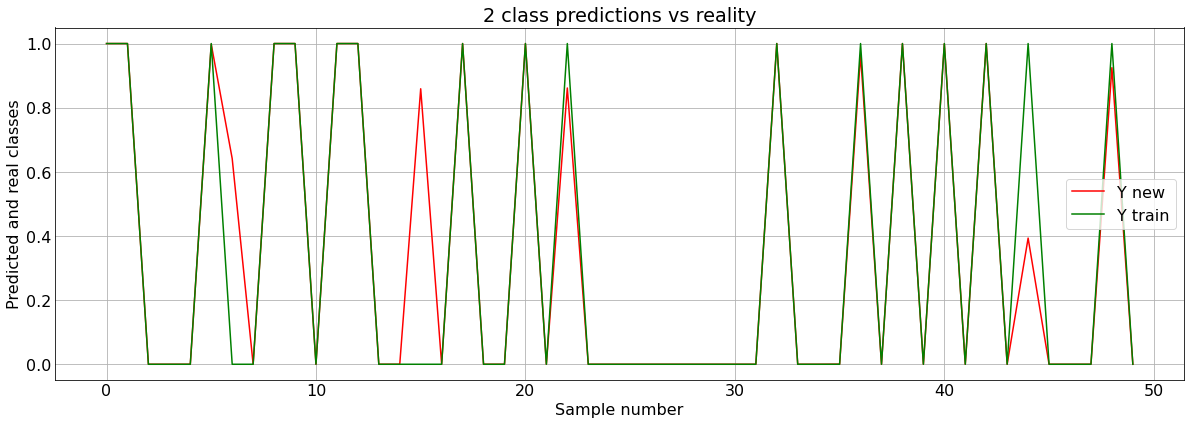

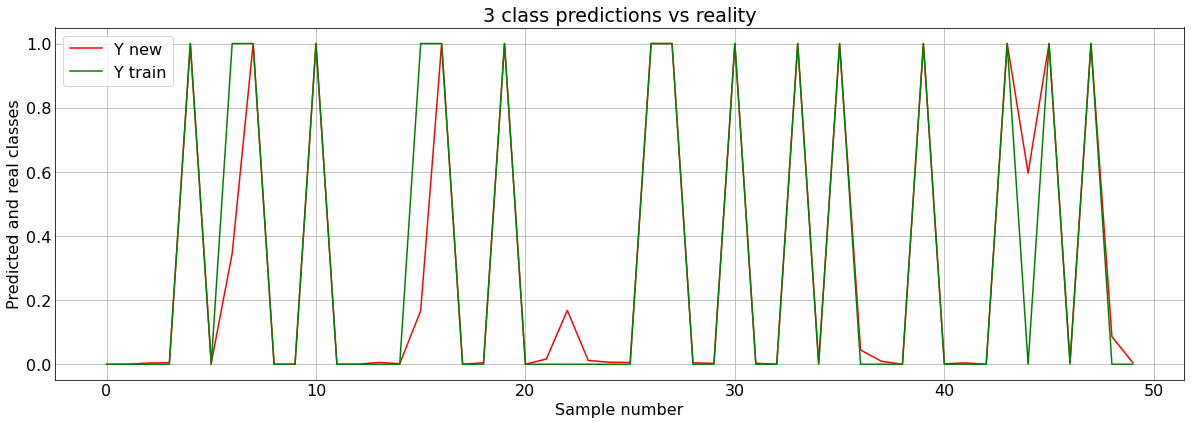

NN accuracy on train data: 98.63%
NN accuracy on test data: 96.71%


In [368]:
# train the model
w0_2, w1_2, errors_2, errors_test_2 = train_neural_net(X_train, X_test, y_train, y_test, w0_1, w1_1, \
                                                       learning_rate=0.09, epochs=11000)

show_training_progress(errors_2, errors_test_2)

# feed_forward()
test_output = feed_forward(X_test, w0_2, w1_2)
test_error_matr = y_test - test_output
mean_test_error = np.mean(np.abs(test_error_matr))

# results
show_preds(test_output, y_test, 0, N=50)
show_preds(test_output, y_test, 1, N=50)
show_preds(test_output, y_test, 2, N=50)

print(f"NN accuracy on train data: {str(round((1 - errors_2[-1]) * 100, 2))}%")
print("NN accuracy on test data: " + str(round((1 - mean_test_error) * 100,2)) + "%")

### Our accuracy on test data increased by 0.55% for previous 11000 iterations.
I guess, it's a good enough result for this data, we just have left with 3-ish% of 'wrong' predictions, but I am pretty confident, it's just the data variance. You can simply look at the green and red lines on the graphics above to see that the model predicts 'obvious' samples very confidently. And vice verca, the neural network makes mistakes only where its predictions aren't so confident. It's also likely, that these data samples can be an outliers or even just wrongly classified examples.

Also, another way of getting better with predictions of a neural network is to provide it with more neurons on the hidden layers. It will take such neural network less epochs to reach the same result, but each epoch will be more difficult to calculate.